<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Generic-Randomizer-Class" data-toc-modified-id="Generic-Randomizer-Class-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Generic Randomizer Class</a></span></li><li><span><a href="#Test-Program" data-toc-modified-id="Test-Program-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Test Program</a></span></li><li><span><a href="#Tests" data-toc-modified-id="Tests-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tests</a></span></li></ul></div>

### Imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import random
import math
import csv
from collections import Counter

### Generic Randomizer Class
This is the only thing that needs to be implemented to get support for all .rng randomizers.

In [2]:
class LoadRandomizer:
    def __init__(self, name):
        """Creates a randomizer from a an .rng file matching the randomizer name."""
        self.piece_map = ['J', 'I', 'Z', 'L', 'O', 'S', 'T']
        self.order = [0, 1, 2, 3, 4, 5, 6]
        random.shuffle(self.order)
        self.state_i = 0
        self.denominator = math.factorial(12)
        self.randomizer = []
        filename = ''.join([name, '.rng'])
        with open(filename, newline='') as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            for row in reader:
                weight = int(row[0])
                pick = int(row[1])
                jump = int(row[2])
                self.randomizer.append([weight, pick, jump])

    def next_piece(self):
        """Generate a new piece given the randomizer state."""
        roll = random.randrange(1, self.denominator + 1)
        while roll > self.randomizer[self.state_i][0]:
            roll -= self.randomizer[self.state_i][0]
            self.state_i += 1
        pick_index = self.randomizer[self.state_i][1]
        self.state_i = self.randomizer[self.state_i][2]
        pick_piece = self.order[pick_index]
        for i in reversed(range(1, pick_index + 1)):
            self.order[i] = self.order[i - 1]
        self.order[0] = pick_piece
        return self.piece_map[pick_piece]

### Test Program

In [3]:
def test_rand(name, n=1000000):
    randomizer = LoadRandomizer(name)
    test_sequence = []
    print("Generating test sequence of length", n, "...")
    for _ in range(n):
        test_sequence.append(randomizer.next_piece())
    print("Sample:")
    print(''.join(test_sequence[0:585]))

    droughts = dict()
    for i in range(13):
        droughts[i] = 0
    current_droughts = dict()
    pieces = "JIZLOST"
    for piece in pieces:
        current_droughts[piece] = 0

    for selection in test_sequence:
        droughts[current_droughts[selection]] += 1
        for piece in pieces:
            current_droughts[piece] += 1
        current_droughts[selection] = 0

    denominator = sum(droughts.values())
    for key in droughts:
        droughts[key] = droughts[key] / denominator
    plot_counter(droughts, "Test of " + name)

def plot_counter(counter, name):
    keys = []
    values = []
    xlim = max(counter.keys())
    xlim = max([xlim, 12])
    for key in range(xlim + 1):
        keys.append(key)
        if key in counter:
            values.append(counter[key])
        else:
            values.append(0)
    plot = plt.plot(keys, values)
    plt.ylim(bottom=0, top=round(max(values) + 0.015, 2))
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.title(name + " Randomizer", fontsize=20, y=1.01)
    plt.xlabel("Drought Size")
    plt.ylabel("Occurence Rate")
    plt.show()

### Tests

Generating test sequence of length 1000000 ...
Sample:
LJJIOLSZTIJOJLSLTJIZOISOTILJZZTJLSIOILOTZSIJLSZILTJOLSIZSJLTOJITZLOIJSTLZILTSOJZSJOLZITZSLJZSTOIZTISJOLITZTIOLJSIZSTSLJOITZZJTOSLISJZIJOSLTLZOJSIJZILOTSJLZOJSTLITJOSLZIOJSZLITOTLSZJILJOZTSISJOLSITZOJJSILOTZOTSJILIOLSZTJISZTIOJLZSITTSZJLIOZTSSJITOLZOTLSJIOSLZSOJTITSLZJOLSTIOZJISLTOJZOTLSIJITLZOSJZLSOTISOLTIZJJTLIOZSJTIZJLOSSLJIOTZSZJLSOZITOJISLZTOZSILJITJLOZSTJILSZTOZIJLOSTJIZZTOJISLOJZSITLISTOJZLOZLTJISTOLZJIOSLZTSZIJTLOLTJISOZOJSITLITSOJZOLOSJTIZOZITLSJOLSZTILJOILZSTSZLIOJISZLTLOJITSIJLZOSLTIJTZSTJOLSIZOTJLLSITOJZLSLTOZIOJSLZTJOIOLJZTSJIJTOLSZJILITOZJTSIOLIJZLSOTZILJLZOSTJLIZOJ


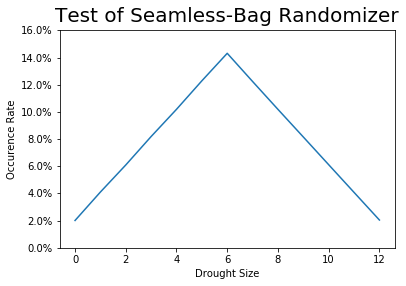

In [4]:
test_rand('Seamless-Bag')

Generating test sequence of length 1000000 ...
Sample:
ZTSZJTILOLSLJITZTSLIOTZSJSZLIOZTSJTZJOLITSISTZOIJLJSZLTOZLIZJTOSJTLISTJZILOITJZSLLSOTZLISJSZOLTISJOZISJLTSOLITJZLOIJTSOJZTISLJLOZTITJLSOTILZJSLOIJSTZIOJLISZLTIJSOJTZSOILZTILSJOZOSJIZLTSLOJZIZLOSTSJISLOZTSIJILIJOLZTISLZIJOTISIZJOLIOTJSLZIITOJSLZLITILJOZSJSTIOLTZJOITSZILSJTOZJTLIOTZSLZJLZOITZLSTZJITOSLIZSJIOTSZJLSJIZSTOJLSZTITJOZJSLTOJISOZTLLJZTIOSZLJTIZTSOTIJSLZTJSILOZTSTOJILOJZSJLTIOSLTJZOISSLTZJSOTISJZLJZOIJSTJLZTOISTSZIOLJJSTLOJZSTILSOTJZILTSZJILTOSZTZJIOZLSZIJTOJTSOLZIITOLJSZLTZJSIOZLZOSJITOJSIZTLJTIOSLOZILOJTLSIZOZIJLSTIJSOLZJZLIOTLJSTJZOSLIZJTSOLZJILOSZTSIZJTILSZOZITJZTIOSL


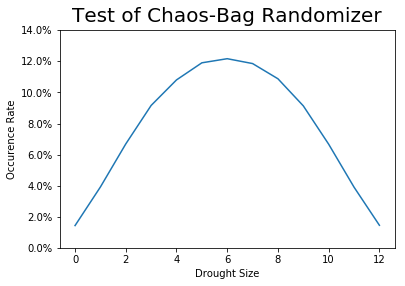

In [5]:
test_rand('Chaos-Bag')

Generating test sequence of length 1000000 ...
Sample:
JZSLTJSOITOLZJSLOTISOTJLZSJIZOJITZLSJOSZLJITJZIOSZLSJOZITSZITOJLZSZJLIOSZTIJZLZSIOTIZLJTSZOLISZLJTILJOZISTISTOJLZTJITSIOZLZSTJIOJTLZOTISZJILZITOSLIJZSZTIOLITJISZOTILSJIZOTSLISLJZIOTZJSTLSJIOZLJTLSZLIOJITLSZSOJISTOLSZJIOTSOLITJZTJOSZITJLILJOSZOJTZILSTSOIJTOZLTSOJILTJIZSJOLTJSOTZILZISJOTZSOILZSJZTLIOOSJZTOISLTLJTZJSOIJLTLOIZSLOJTLSJZIOOZTSLTJILOJZLSJZTLIZOISOJITZLOISJZLTSJLOILSOZTSJTISOZLTJTZSOIJTZOLOJIZTSJTOLJSILZJOTZTSLOITSJZIJSLZIOJTZSLJITSLOZSOIZTJLJSTOLIZZTJLSTOLIOTJZOSZOJITLJITSZJOTSZLIIZSJOTLOIZSJOTSLIZZSJTZOLSJIOTOZOISJLOSZTITJSLOLJITZTSZTOJILOJZSTZOJILILSJTOZTIOLITSJOIZIJ


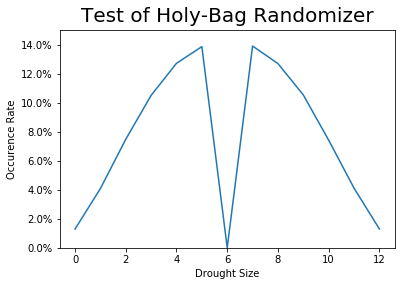

In [6]:
test_rand('Holy-Bag')

Generating test sequence of length 1000000 ...
Sample:
IOZJSLTTLSZIOJOJZILTOSSOLTZJSISJZITOSLLOTSJIZZSIJOTLLTOSIZOLJOTZOJLSISIOZLTOJTOZILSSLZIOTJJTSJIZOLLOZJITSSTJIZOLOZISLJTTLISJOZZJOILTSTLSIOJZZOJISLTTLZTSJIOOIJTZLSLZSJTOIOTJSLZLZTIOSLTJTOLZIJLTOSSTOILJZZLJOISTTSIOJZLLZOJISTSITOJLZZLJOITSTIOSJZLLZTSLIZJOJOZITJLSSJLTIZOOZTJISOZLLOIZJSTTSJILZTOOTLIJSOLTZZLSTJIOITJZLSSLJTZOIOZTILJSJLSIOJZTTJOLIZSSZILTSOJOSITZJOSLSOLTISJZJIZSTLOOTSLIZJJILZSTOOTLZSIJJSLZIOJTJOTLSOZTJIIJTSOLZZLSTJOIIOJTSZLLSJZTIOIOTZLJSJLTZIJSOOJSITLZZLITOSJSOJILTZZLTOSJTZIZLIJZOTLSSTOIJLZZLOISTJJSTILOZOLZTJISSIOJTLZZTLIJOSSOJITLZZTLIOJSJOISLTZTZLSOJZTIITZOLSIJJILTZSOSZ


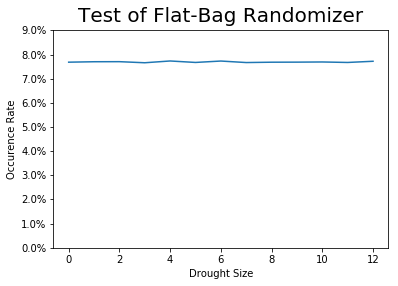

In [7]:
test_rand('Flat-Bag')

Generating test sequence of length 1000000 ...
Sample:
ZSJOLTILZOSTJLZIOTJZSLOIJZSTLIOSTJLOZITJLSOITOZLSJTOIZSTLJISOLJZITSLJOZILTSZOJLIZTSJLOTZILSJOTLZOSIJZLTISOOTIJLZTOISLJOTZSIIOZTJSLIZOTJSLOITZIJILZOTSLIJOTZJTOSLZJISTOLZJTIOLSTZOIJTSZOLZILZOTSJLITOZJSILOTZISJLZOSTILZTOJSIZTLOSJZITOJZSLOSTJZIOLSJIOTZSLJIOZTJSLILZSTJOILZSTOJZLIOJZTSOJLTIOSZLTJSOIZTJLSITLJZOTILSZTJILOSTJLOISZTJOSZILOSJTLIZOJSTZIOLSTJOZSILTJZOLSTIZOLSJITLOZJSLIOTJLSZTIOSLJTOSLZIJTLSOJZOTIOJSLTZIOSJTLIZOSJLITLSZOTJILZSOTJLIOZSLIOZSJTIZOTJLSOTIZJLTSIOJZLSTIJLSTOJZOLTSIOZLTJIOSLZITJOLSTZOJITSLZJLOITZJLSOTIJZOTISLJOZSILTJJZLOTSJZLIOSTZJIOSLZJTOISLZJTOSLTJIZSOLTJSZITOJLZS


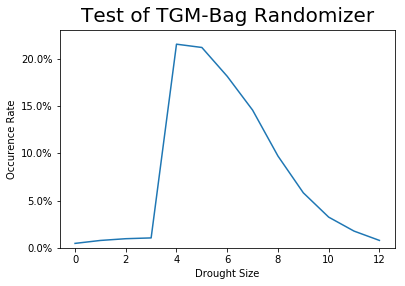

In [8]:
test_rand('TGM-Bag')

Generating test sequence of length 1000000 ...
Sample:
ZOTLIZSJTIOSLZIOJTLSZJILOSTZLJIOZTSLJZISOTLJIZSOTJLIOZTSLOJZISTLZOIJSTOLIZJOTSIJLZOTIJSOLIZTOJSZLTIOZJSLTIZOSJLIZTJOSIZLTJSOLZITJSOZTLSIOJLZITSLOIJSZOTLJISZTOLJISTZJLOSITLJZIOTSLZIJTSOILJZOSTLIJSZTOILJTZSOITLJOZSLIJTOZISLJZTOLJISZOTJLZSITLOZJSITZLOSJZTILOZSTJOLISZOLTJSIZLOTSJIZLOTIJSZOLTIJOLSZJOTIZJLSTZOILTJOSLZTIJOSTILZOJSTZOILSJTIZSOJLZITJSOZTLIJSOZIJTLSOJZITLJSZOTISLJTZOILJSTZIOLSJTIOZLSIJTLOZJISOTLZSJOIZLTSIOJTZILSTZOJSTILZJOSTLIOJZSITJLZOITSLJZTOLIJSZOTILSJOTZLSIJZOTSLZJIOTLSIZOJLTZSILJOZSTJIOLSZTIJSOLIZJTSLOZISJLTZOSILJZTISOLJIZSTOIJLZSTOLIZJTSOZILSOJTISZLOTSJILOZJTSLIOJTZ


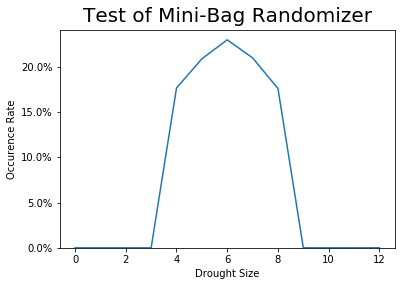

In [9]:
test_rand('Mini-Bag')

Generating test sequence of length 1000000 ...
Sample:
JITSITZOLISJTSILJZOTZITJSOLZOLZTJSIOOJSITZLSJLITZOSITJOZLLJSITZOSZTIOJLLIOJTZSSJLZOSTISLIOZTJSLZOJSITTJLISTOZISJLTOZTSITJOZLTISJISLZOTJLZITOSJOTIZJSLJZLSITOLZOTJSIJZOSITLISJILZOTZOTJILSSLTOZSIJLTTZOTJLSIZOTTOZISLJZITZJOSLITOJZSTZLISOZTJZTJISOLSILTJOZSIJTLOZLOSLJTZIIZOSTJLLSILTJOZLISTILJSTOZJLZOIJTZLSOTJIZOTJILSSOZJTZILOSJTZISOLJOSTZSLIOZTJSSILSTJOZSLZOITJZTSLTSIOLZJTTJZLOISZISJOLTZZOJTISLJTISZJLOOZTISLJJZOJTOSIZLIZJSLIOTZOIJOZTLSIJOZTIZLSOJSIJLTSZJLTIOSSTIOZSLJOITLSTIZLOJSOLZISJTOLZJSOTILTJSILOZZISOLJTZZTIZOSJLTJLIZTSOTSJZILOIZOSTIJLSTZOIJOZLSJITOSLZJITOIJSIZLOTIOLSJZTIZLOZSTIJL


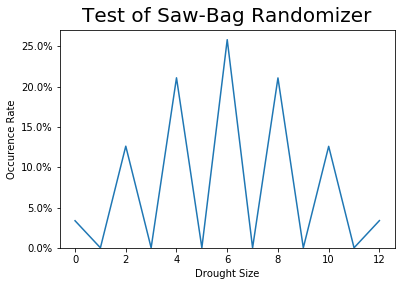

In [10]:
test_rand('Saw-Bag')